In [56]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [113]:
from pathlib import Path

from attila.util.config import get_config
from attila.data.parse import parse_data, get_data
from attila.experiments.data import load_experiments, save_experiments
from attila.experiments.do import do_experiments

In [58]:
_here = Path('.').resolve()
config = get_config(_here / './config.ini')

data_path = _here / config.get('data', 'folder')
data_path = data_path.resolve()

out_path = Path(config.get('experiments', 'output folder')).resolve()
out_path.mkdir(parents=True, exist_ok=True)  # rm and mkdir if existing

images_path = data_path / config.get('data', 'images')
masks_path = data_path / config.get('data', 'masks')

In [59]:
raw = get_data(images_path, masks_path)
X, y = parse_data(
    raw,
    (config.getint('image', 'width'), config.getint('image', 'height'))
)

In [104]:
x = X[10, ...]

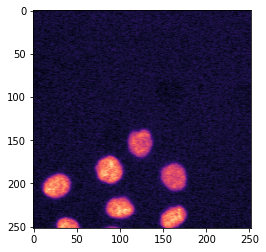

In [105]:
from matplotlib import pyplot as plt

plt.imshow(x[..., 0], cmap='magma')

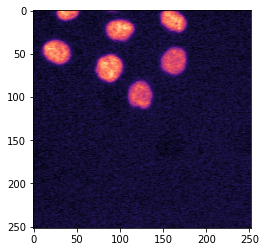

In [109]:
plt.imshow(np.flip(x, axis=0)[..., 0], cmap='magma')

In [76]:
A.tolist()

[[[0, 1], [2, 3]], [[4, 5], [6, 7]]]

In [80]:
np.flip(A, axis=2).tolist()

[[[1, 0], [3, 2]], [[5, 4], [7, 6]]]

22

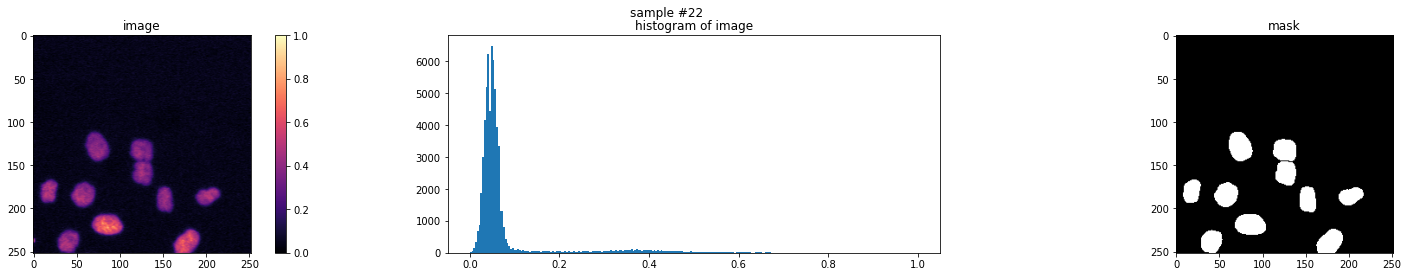

In [112]:
from attila.util.plots import plot_sample

plot_sample(X, y, cmap='magma')

In [37]:
experiments_file = _here / config.get('experiments', 'output file')
experiments = load_experiments(experiments_file)

In [8]:
experiments = do_experiments(experiments, (X, y), config, out_path)
save_experiments(experiments, out_path / config.get('experiments', 'output file'))

ready to perform 8 experiments
=== experiment # 1 / 8: with_same
= dataset training: X ~ (73, 252, 252, 1), y ~ (73, 252, 252, 1)
= dataset validation: X ~ (9, 252, 252, 1), y ~ (9, 252, 252, 1)
= dataset test (not used): X ~ (10, 252, 252, 1), y ~ (10, 252, 252, 1)
=== model
= # layers: 25
= # total params: 1881985
= # trainable params: 1881985
= # non-trainable params: 0
Epoch 1/5
19/19 [==============================] - ETA: 0s - loss: 0.2573 - accuracy: 0.9032 - mean_IoU: 0.1224 - DSC: 0.1408
Epoch 00001: loss improved from inf to 0.25732, saving model to /home/h4/stfo194b/scratch/attila/out/with_same/model.h5
19/19 [==============================] - 1s 70ms/step - loss: 0.2573 - accuracy: 0.9032 - mean_IoU: 0.1224 - DSC: 0.1408 - val_loss: 0.2326 - val_accuracy: 0.9645 - val_mean_IoU: 0.5485 - val_DSC: 0.6884 - lr: 0.0010
Epoch 2/5
19/19 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9867 - mean_IoU: 0.7799 - DSC: 0.8694
Epoch 00002: loss improved from 0.2

In [48]:
from attila.experiments.tools import create_tex_experiments

create_tex_experiments(experiments, config)

creating .tex table for 8 experiments configurations

with_same & \cmark{} & \xmark{} & same & 25 & 1881985 \\
without_same & \xmark{} & \xmark{} & same & 21 & 1697665 \\
with_valid & \cmark{} & \xmark{} & valid & 25 & 1881985 \\
without_valid & \xmark{} & \xmark{} & valid & 21 & 1697665 \\
with_same_se & \cmark{} & \cmark{} & same & 53 & 1897857 \\
without_same_se & \xmark{} & \cmark{} & same & 49 & 1713537 \\
with_valid_se & \cmark{} & \cmark{} & valid & 53 & 1897857 \\
without_valid_se & \xmark{} & \cmark{} & valid & 49 & 1713537 \\

creating .tex table for 8 experiments results

with_same & 0.937 (-1.4 \%) & \textbf{0.656} \\
without_same & 0.914 (-3.9 \%) & 0.654 (-0.3 \%) \\
with_valid & 0.933 (-1.9 \%) & 0.650 (-0.9 \%) \\
without_valid & \textbf{0.951} & 0.647 (-1.4 \%) \\
with_same_se & 0.907 (-4.6 \%) & 0.646 (-1.5 \%) \\
without_same_se & 0.824 (-13.3 \%) & 0.617 (-5.9 \%) \\
with_valid_se & 0.917 (-3.6 \%) & 0.642 (-2.2 \%) \\
without_valid_se & 0.910 (-4.3 \%) & 0.635 (-3.